# Three-body Stability

## Historical overview

The three-body problem ([**TBP**](https://en.wikipedia.org/wiki/Three-body_problem)) was developed and studied by Isaac Newton is his pioneering work, [the Principia](https://en.wikipedia.org/wiki/Philosophi%C3%A6_Naturalis_Principia_Mathematica).  In Newton's formulation, a solution to the TBP would analytically (exactly) describe the motion of the Moon under the influence of gravity from both the Earth and the Sun.  However, this problem would not be solved by Newton (or anyone).  

[King Oscar II](https://en.wikipedia.org/wiki/Oscar_II) commemorated his birthday in 1889 with a contest, where he invited the top scholars to attempt solutions to the TBP.  It was a French mathematician, [Henri Poincare](https://en.wikipedia.org/wiki/Henri_Poincar%C3%A9), at the University of Paris who "won" the contest.  Poincare showed that the TBP could not be solved due to an insufficient number of constants of motion (11) relative to the 18 equations of motion that generally define the problem.  In other words, the TBP is non-integrable does not have an unambiguous solution in terms of algebraic and transcendental functions.

Poincare showed that no solution to the general TBP exists, but some particular solutions do exist.  These solutions can have several requirements that are subsumed into the numenclature.  For example, the [circular-restricted TBP](https://farside.ph.utexas.edu/teaching/celestial/Celestial/node80.html) requires that the one body is much less massive than the other two (i.e., restricted $\rightarrow$ $m_3 \ll m_1$ and $m_3 \ll m_2$) and the two more massive bodies orbit one another on circular orbits.

Other solutions require central configurations, such as those proposed by Euler ([collinear](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem)) and Lagrange ([equilateral triangle](https://en.wikipedia.org/wiki/Three-body_problem#Special-case_solutions)).  In 2013, physicists at the Insitute of Physics in Belgrade discovered 13 new families in the equal-mass, zero angular momentum TBP (see their [gallery](http://three-body.ipb.ac.rs/)).

Instead of searching for analytical solutions, others have used numerical approximations (or computational solutions) to solve the problem.  Although less elegant, such techniques are generally more practical because investigators can explore wide swathes of potenatial parameter space using modern parallel computing.  

This guide will focus on numerical approaches for the case of a planet orbiting a pair of binary stars.  In this case, the planet is (at most) a Jupiter-mass body and naturally requires the restricted TBP because the two primary bodies are stellar masses ($m_2>0.08\ M_\odot$; $m_1 \ge m_2$).  In 1982, Rudolf Dvorak defined three potential configurations of planets in binary systems: S-Type, P-Type, or T-Type (see Figure {numref}`{number}<planet_configs>`).

```{figure-md} planet_configs
<img src="https://www.astronomy.com/wp-content/uploads/sites/2/2023/02/exoplanetorbits.png?resize=600%2C369" alt="planet configurations"  width="600px">

Possible configurations of exoplanets in binary star systems ([Dvorak 1982](https://ui.adsabs.harvard.edu/abs/1982OAWMN.191..423D/abstract)).  The planet can orbit either star (S-Type), both stars, (P-Type), or along the orbit of the secondary as a Trojan (T-Type). Figure credit: [Astronomy: Roen Kelly](https://www.astronomy.com/science/can-solar-systems-exist-in-a-binary-star-system/).
```


## Updating the standard ([Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract))

From ${\sim}1980-2000$, the growth of computational power allowed researchers to better understand the motion of three bodies.  In the 1980s, most numerical simulations were limited to ${\sim}10^3\ T_{\rm bin}$ (scaled by the binary orbital period $T_{\rm bin}$) in simulation time due to the excessive wall time required for the computations.  Many researchers turned to dynamical indicators of chaos (e.g., [Benettin et al. 1980](https://ui.adsabs.harvard.edu/abs/1980Mecc...15....9B/abstract), [Lecar et al. 1992](https://ui.adsabs.harvard.edu/abs/1992AJ....104.1230L/abstract),  [Smith & Szebehely 1993](https://ui.adsabs.harvard.edu/abs/1993CeMDA..56..409S/abstract), [Froeschle et al. 1997](https://ui.adsabs.harvard.edu/abs/1997CeMDA..67...41F/abstract)) to identify *possible routes* to unstable orbits. 

[Dvorak (1986)](https://ui.adsabs.harvard.edu/abs/1986A%26A...167..379D/abstract) and [Rabl & Dvorak (1988)](https://ui.adsabs.harvard.edu/abs/1988A%26A...191..385R/abstract) showed that there is a transition between regular (periodic), quasi-periodic, and chaotic orbits for planets in binaries.  Unstable (or unbound) orbits are non-periodic, which can overlap in type with chaotic orbits.  There are chaotic orbits that remain bound to the system.  Therefore, chaos **does not** imply instability.

Orbital chaos is a sensitivity to initial conditions, which means that starting the planet or binary at slightly different positions can result in a drastically different orbital behavior.  Starting the planet a degree ahead (or behind) in its orbit through its initial mean (or true) anomaly means that the planet will feel a slightly different net force initially.  This slight difference in net force can speed up (or slow down) the planet and lead to an increase in its orbital eccentricity.  The secondary star can 

- "pump" the planet's orbital eccentricity through exchanges of angular momentum, or 
- scatter the planet (change in planetary semimajor axis) through exchanges of orbital energy.

[Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) focused on the potential to scatter a single planet.  They performed numerical simulations with the following assumptions:

1. The planet does not influence the orbit of the host binary (i.e., a test (zero-mass) particle).
2. The planet begins on a circular, coplanar orbit (relative to the host binary).
3. The planet and binary orbits can be scaled hierarchically, where the initial planetary **semimajor axis ratio** is $\rho = a_p/a_{\rm bin}$.
4. The binary masses are scaled by the **mass ratio** $\mu = m_2/(m_1+m_2)$, where $m_1\ge m_2$.
5. A critical semimajor axis $a_c$ exists for the planet where planets with 
   - $a_p \leq a_c$ are bound for $10^4$ binary orbits (i.e., scaled by $T_{\rm bin}$) and 
   - $a_p > a_c$ are unbound within a time $t<10^4\ T_{\rm bin}$.
6. The planetary and binary orbits are initially aligned $(\omega_p = \omega_{\rm bin})$, where the binary begins at either periastron $(f_{\rm bin} = 0^\circ)$ or apastron $(f_{\rm bin} = 180^\circ)$.

These are not bad assumptions considering the computing power and knowledge of planetary systems during the late 1990s.  For a given mass ratio $\mu$, and binary eccentricity $e_{\rm bin}$, an initial condition $(\rho,\ f_p)$ is evaluated.  The semimajor axis ratio range differs for S-Type $(0.02\leq \rho \leq 0.5)$ and P-Type $(1\leq \rho \leq 5)$ (see Figure {numref}`{number}<planet_configs>`).  But eight equidistant values of the planetary true anomaly ($f_p = 0^\circ - 315^\circ;\ 45^\circ$ increments) are used.  *Note that the planetary mean anomaly $M$ and true anomaly $f$ are interchangeable for **circular** orbits.*

```{figure-md} planet_ICs
<img src="threebody_stability/HW_Table1.png" alt="HW Table 1"  width="400px">

Initial conditions used in [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for both S-Type and P-Type planets.
```

This is a 4D space, where two dimensions $(\mu\ \&\ e_{\rm bin})$ depend on the host binary, while the other two dimensions $(\rho\ \&\ f_p)$ depend on the planet's initial position.  It can be easier to conceptualize traversing this space through a 2D grid within another 2D grid as shown in Figure {numref}`{number}<param_grid>`.

```{figure-md} param_grid
<img src="threebody_stability/HW_4dim.png" alt="HW dimensions"  width="400px">

A 4D parameter space abstracted into two nested 2D grids.
```

The results of each nested grid can be summarized by identifying a critical semimajor axis ratio $\rho_{\rm cr}$ for a given $(\mu,\ e_{\rm bin})$ combination.  The critical semimajor axis ratio $\rho_{\rm cr}$ is defined as the boundary between stable and unstable initial conditions $(\rho,\ f_p)$:

- one side of the boundary has a planet that survives the full simulation time for all values of $f_p$
- the other side has simulations that terminate early due to close approaches (i.e., scatters) with either star or an escape from the system.

Table {numref}`{number}<stability_grid1>` shows the results for $\mu = e_{\rm bin} = 0.5$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets, where the $"+"$ symbols denote stable (i.e., no scatters or escapes).

```{figure-md} stability_grid1
<img src="threebody_stability/HW_Table2.png" alt="HW Table 2"  width="600px">

Planet survival results for $\mu = e_{\rm bin} = 0.5$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets.
```

Table {numref}`{number}<stability_grid2>` shows data that has been reduced, where each cell in the table represents the critical semimajor axis $\rho_{\rm cr}$ determined through a smaller grid similar to Table {numref}`{number}<stability_grid1>`.

```{figure-md} stability_grid2
<img src="threebody_stability/HW_Table3.png" alt="HW Table 3"  width="600px">

Planetary critical semimajor axis $\rho_{\rm cr}$ from [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) for S-Type planets.
```

From Table {numref}`{number}<stability_grid2>`, [Holman & Wiegert 1999](https://ui.adsabs.harvard.edu/abs/1999AJ....117..621H/abstract) perform a least-squares fit given the trial function:

```{math}
:label: HW_formula
\rho_{\rm cr} = c_1 + c_2\mu + c_3e_{\rm bin} + c_4\mu e_{\rm bin} + c_5 e_{\rm bin}^2 + c_6 \mu e_{\rm bin}^2.
```

The least-squares fitting procedure identifies values of $c_1-c_6$ that minimizes $\chi^2$ (e.g., the residuals or cost function).  

The above procedure has merits in that it will accurately reproduce the critical semimajor axis $\rho_{\rm cr}$ for other parts of the $(\mu,\ e_{\rm bin})$ parameter space through an easy-to-use polynomial.  However, larger discrepancies appear when extrapolating to broad regimes of mass ration $\mu$ (e.g., $\mu \leq 0.1$ and $\mu \geq 0.9$).  There can be significant differences if the planetary orbit is misaligned with the host binary, which is expected from disk observations in binaries (e.g., [Monin et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006A%26A...446..201M/abstract)).

[Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract) addresses these issues in two ways:

1. expand the simulations to cover a wider range in $\mu$ and increase the grid resolution,
2. evaluate the simulations for a range of planet inclinations.

Figure {numref}`{number}<stability_grid3>` illustrates the results of [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract), where the color-code represents $\rho_{cr}$ and each panel assumes a different initial inclination for the planet.

```{figure-md} stability_grid3
<img src="threebody_stability/Q20_Fig7.png" alt="Q20 Fig 7"  width="600px">

Planetary critical semimajor axis $\rho_{\rm cr}$ (color-coded) from [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract) for S-Type planets.  Each panel illustrates how the value of $\rho_{\rm cr}$ changes with planetary inclination.
```

The above parameter spaces can also be fit using the same trial function (Eq. {eq}`HW_formula`), but the data underlying the above figure is available in a GitHub repo [saturnaxis:ThreeBody_Stability](https://github.com/saturnaxis/ThreeBody_Stability).  Using the data file for the coplanar case and interp2D, one can easily identify $\rho_{\rm cr}$.

In [3]:
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

mu = 0.5
ebin = 0.5

github_file = "https://raw.githubusercontent.com/saturnaxis/ThreeBody_Stability/master/a_crit_Incl[0].txt"
data = np.genfromtxt(github_file,delimiter=',',comments='#')

X = data[:,0]
Y = data[:,1]
Z = data[:,2]

xi = np.concatenate(([0.001],np.arange(0.01,1,0.01),[0.999]))
yi = np.arange(0,0.81,0.01)
zi = griddata((X,Y),Z,(xi[None,:],yi[:,None]),method = 'linear',fill_value=0)

f = interp2d(xi, yi, zi, kind='linear')

astab = f(mu,ebin)[0]
print("For mu = %1.2f, e_bin = %1.2f, the critical semimajor axis ratio rho_cr = %1.2f" % (mu, ebin,astab))

For mu = 0.50, e_bin = 0.50, the critical semimajor axis ratio rho_cr = 0.12


A nearly identical procedure can be applied to determine the critical semimajor axis ratio for P-Type planets using the GitHub repo [saturnaxis:CBP_stability](https://github.com/saturnaxis/CBP_stability).

In [3]:
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

mu = 0.2937/(1 + 0.2937)  #converting from q --> mu  Doyle et al. (2011)
ebin = 0.15944

github_file = "https://raw.githubusercontent.com/saturnaxis/CBP_stability/master/a_crit.txt"
data = np.genfromtxt(github_file,delimiter=',',comments='#')

X = data[:,0]
Y = data[:,1]
Z = data[:,2]

xi = np.concatenate(([0.001],np.arange(0.01,1,0.01),[0.999]))
yi = np.arange(0,0.81,0.01)
zi = griddata((X,Y),Z,(xi[None,:],yi[:,None]),method = 'linear',fill_value=0)

f = interp2d(xi, yi, zi, kind='linear')

astab = f(mu,ebin)[0]
print("For mu = %1.2f, e_bin = %1.2f, the critical semimajor axis ratio rho_cr = %1.2f" % (mu, ebin,astab))

For mu = 0.23, e_bin = 0.16, the critical semimajor axis ratio rho_cr = 2.70


## Stability for (P-Type) circumbinary planets

### A sample simulation (Kepler-16b)

In [51]:
import rebound
import numpy as np
import os

M_J = 9.54e-4 #Jupiter mass in Msun

#Kepler-16 parameters from Doyle et al. (2011)
M_A = 0.6897 #mass of star A in Msun
M_B = 0.20255 #mass of star B in Msun
a_bin = 0.22431 #binary semimajor axis in AU
T_bin = 41.079220/365.25 #binary orbital period in yr
e_bin = 0.15944 #binary eccentricity
inc_bin = 0#np.radians(90.30401) #binary inclination on the sky plane
omg_bin = np.radians(263.464) #binary argument of periapse
RA_bin = 0 #binary longitude of nodes
MA_bin = np.radians(92.352) - omg_bin #binary mean anomaly from mean longitude

M_p = 0.333*M_J
a_p = 0.7048 #planet semimajor axis in AU
T_p = 228.776/365.25 #planetary orbital period in yr
e_p = 0.0069 
inc_p = 0#np.radians(90.0322) #planetary inclination on the sky plane
omg_p = np.radians(318) #planetary argument of periapse
RA_p = np.radians(0.003) # planetary longitude of nodes
MA_p = np.radians(106.51) - omg_p #planetary mean anomaly from mean longitude

def simulation(tscale):
    sim = rebound.Simulation()
    sim.integrator = 'ias15'
    sim.units = ('AU','yr','Msun')
    sim.dt = 0.025*T_bin

    sim.add(m=M_A)
    sim.add(m=M_B,a=a_bin,e=e_bin,inc=inc_bin,omega=omg_bin,Omega=RA_bin,M=MA_bin) 
    sim.move_to_com()
    sim.add(m=M_p,a=a_p,e=e_p,inc=inc_p,omega=omg_p,Omega=RA_p,M=MA_p)

    sim.automateSimulationArchive("Kepler16.bin",step=10,deletefile=True)
    sim.integrate(tscale)

simulation(10)


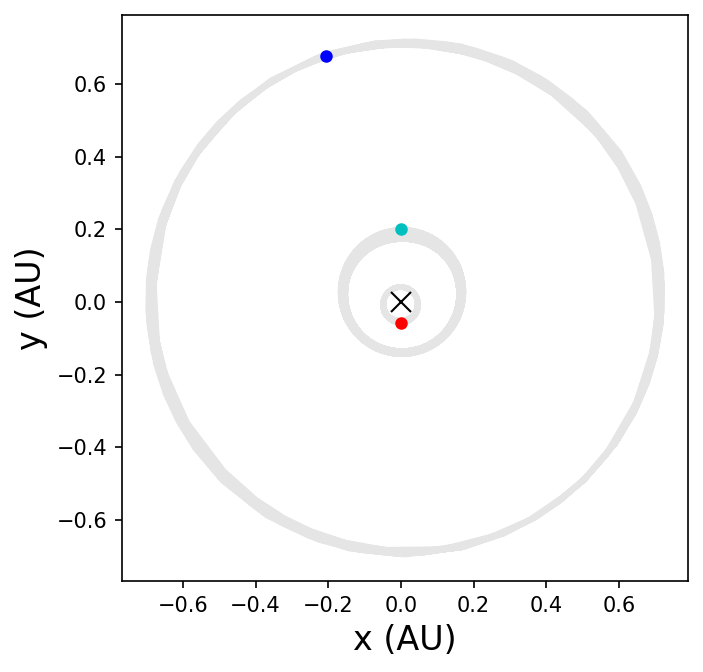

In [52]:
import rebound
import numpy as np
import matplotlib.pyplot as plt 

def Rot_x(ang,x):
    rot = np.array([[1, 0, 0], [0,np.cos(ang),-np.sin(ang)],[0,np.sin(ang),np.cos(ang)]])
    return np.dot(rot,x)

#plot the simulation
sa = rebound.SimulationArchive("Kepler16.bin")

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.plot(0,0,'kx',ms=10)
xy_coords = np.zeros((len(sa),6))
for s in range(0,len(sa)):
    sim = sa[s] #iterate through each snapshot in sa
    ps = sim.particles #intermediate object to simplify the referencing
    sim.move_to_com() #shift to center-of-mass coordinates
    for p in range(0,len(ps)):
        Cart = np.array([ps[p].x, ps[p].y, ps[p].z])
        rot_xy = Rot_x(-inc_bin,Cart)
        xy_coords[s,2*p] = rot_xy[0] 
        xy_coords[s,2*p+1] = rot_xy[1]

color = ['r','c','b']
for p in range(0,3):   
    ax.plot(xy_coords[:,2*p],xy_coords[:,2*p+1],'k-',lw=2,alpha=0.1)
    ax.plot(xy_coords[0,2*p],xy_coords[0,2*p+1],'.',color=color[p],ms=10)

ax.set_xlabel("x (AU)",fontsize=16)
ax.set_ylabel("y (AU)",fontsize=16);

## Stability for (S-Type) circumstellar planets

### A sample simulation ($\gamma$ Cephei Ab)